# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize band)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(1970 12, 1)
end = datetime.datetime.now()

Define percent bands

In [4]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [5]:
strategies = pd.Series()
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    _, strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,7.22,7.10,7.16,7.10,6.95,7.34,7.43,7.49,7.18,7.31,7.22,6.71,6.31,6.18,5.70,5.68,5.54,5.84,6.14,6.04
max_closed_out_drawdown,-28.26,-24.16,-22.21,-22.47,-21.54,-25.38,-25.08,-21.35,-21.73,-21.73,-21.77,-36.89,-37.12,-37.70,-37.67,-34.27,-34.27,-34.73,-35.01,-35.54
drawdown_annualized_return,-3.91,-3.40,-3.10,-3.17,-3.10,-3.46,-3.38,-2.85,-3.03,-2.97,-3.01,-5.50,-5.88,-6.10,-6.60,-6.03,-6.19,-5.95,-5.70,-5.89
drawdown_recovery,-3.76,-1.98,-1.98,-3.76,-3.69,-3.69,-2.64,-0.99,-0.99,-0.99,-0.99,-0.99,-0.99,-1.23,-1.23,-1.52,-1.52,-1.52,-1.52,-1.52
best_month,13.42,14.93,14.92,14.92,14.93,14.94,14.92,14.94,14.55,14.55,14.55,14.52,14.55,14.51,14.49,14.52,14.49,14.54,14.55,14.55
worst_month,-11.96,-13.82,-13.83,-13.82,-13.82,-13.83,-13.83,-13.94,-13.94,-13.93,-13.94,-31.44,-31.44,-31.45,-31.42,-31.45,-31.45,-31.44,-31.47,-31.45
sharpe_ratio,0.74,0.73,0.73,0.72,0.71,0.74,0.75,0.75,0.72,0.73,0.71,0.65,0.61,0.60,0.56,0.56,0.54,0.56,0.58,0.57
sortino_ratio,0.84,0.82,0.83,0.82,0.81,0.84,0.85,0.85,0.82,0.83,0.83,0.71,0.67,0.66,0.61,0.61,0.59,0.62,0.65,0.65
monthly_std,2.88,2.92,2.92,2.92,2.93,2.92,2.93,2.95,2.94,2.97,3.00,3.14,3.16,3.16,3.20,3.19,3.22,3.25,3.29,3.34
pct_time_in_market,70.66,70.60,70.18,70.32,70.50,70.09,70.50,70.75,70.41,71.92,73.43,73.66,74.21,74.17,73.72,73.72,74.35,75.78,76.85,78.93


Bar graphs

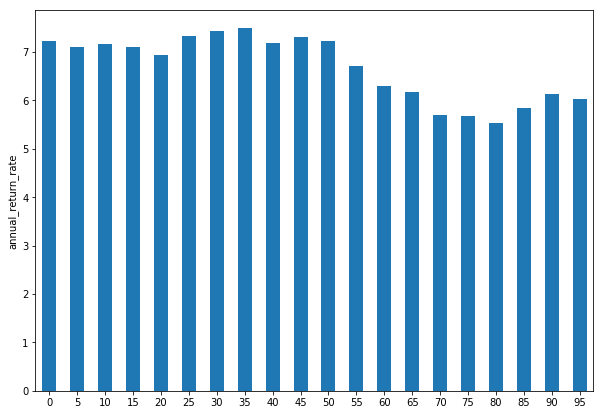

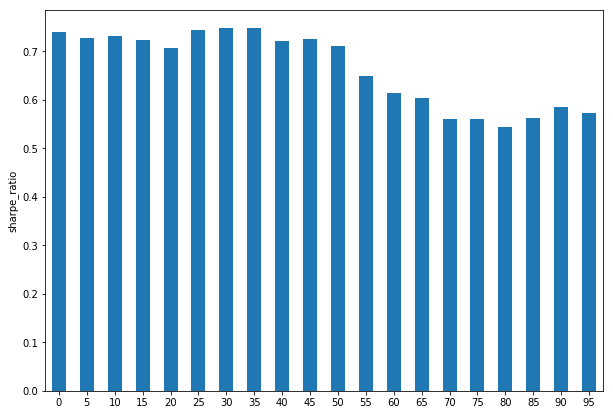

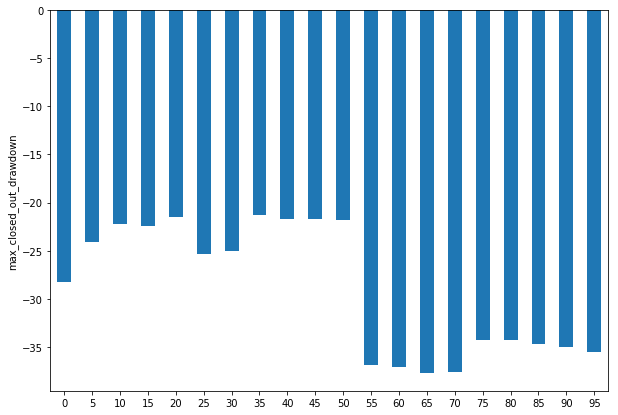

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-10-18 00:00:00 BUY  499 ^GSPC @ 20.01
2019-07-24 00:00:00 SELL 499 ^GSPC @ 3019.56


Equity curve

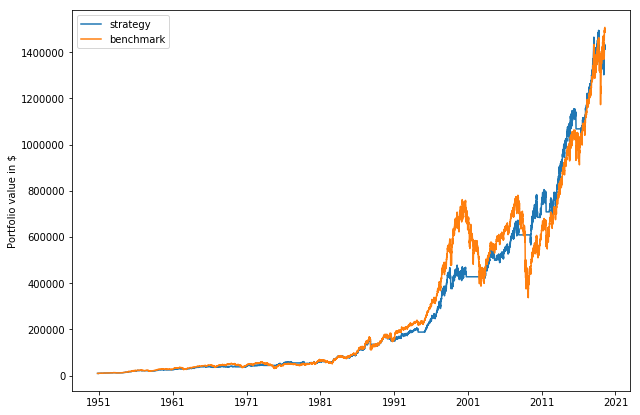

In [9]:
pf.plot_equity_curve(strategies['35'].dbal, benchmark=benchmark.dbal)